Premer grafa: 4
Iteracija: 1


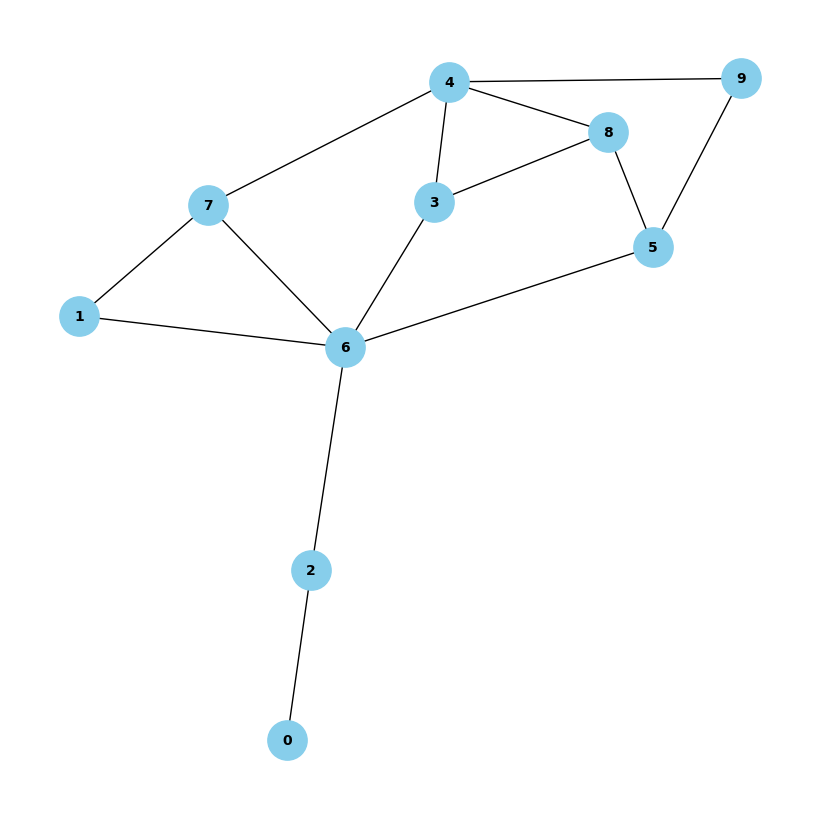

Premer grafa: 5
Iteracija: 2


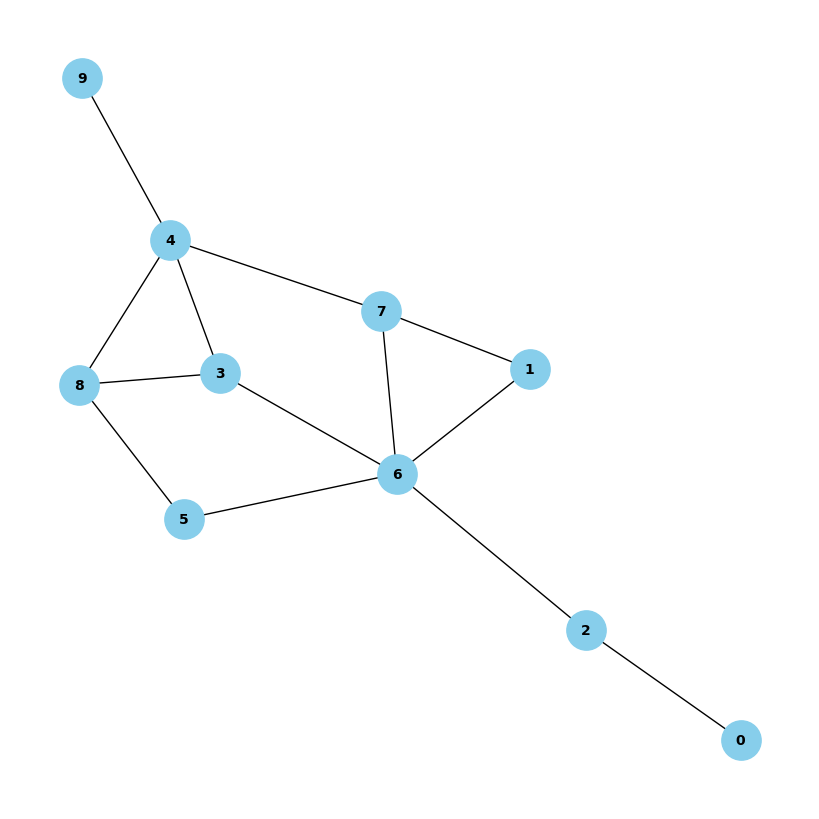

Premer grafa: 5
Iteracija: 3


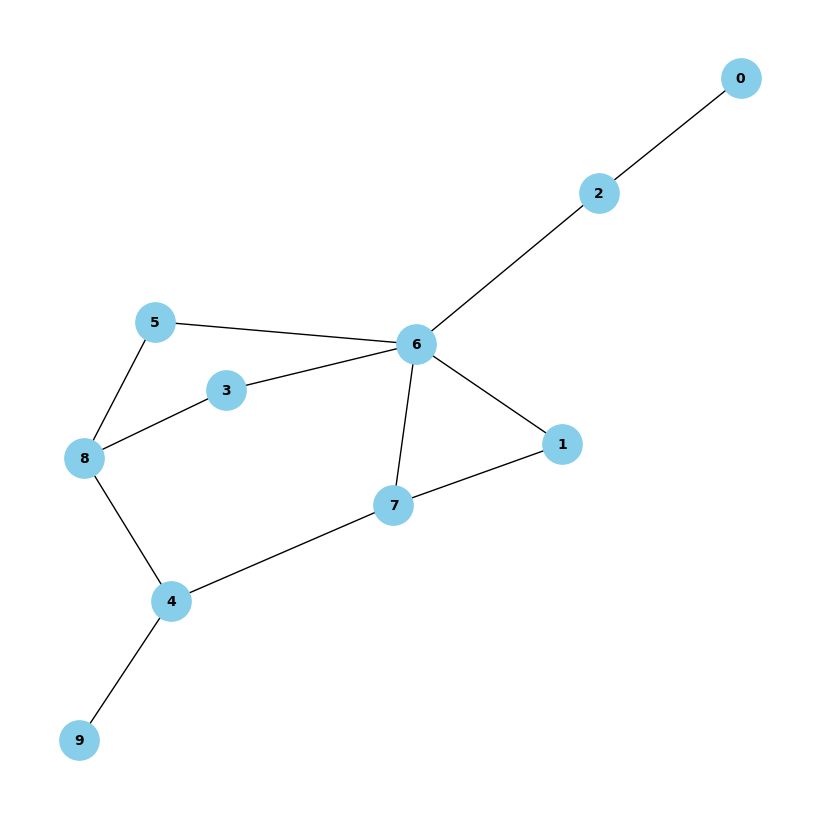

Premer grafa: 5
Iteracija: 4


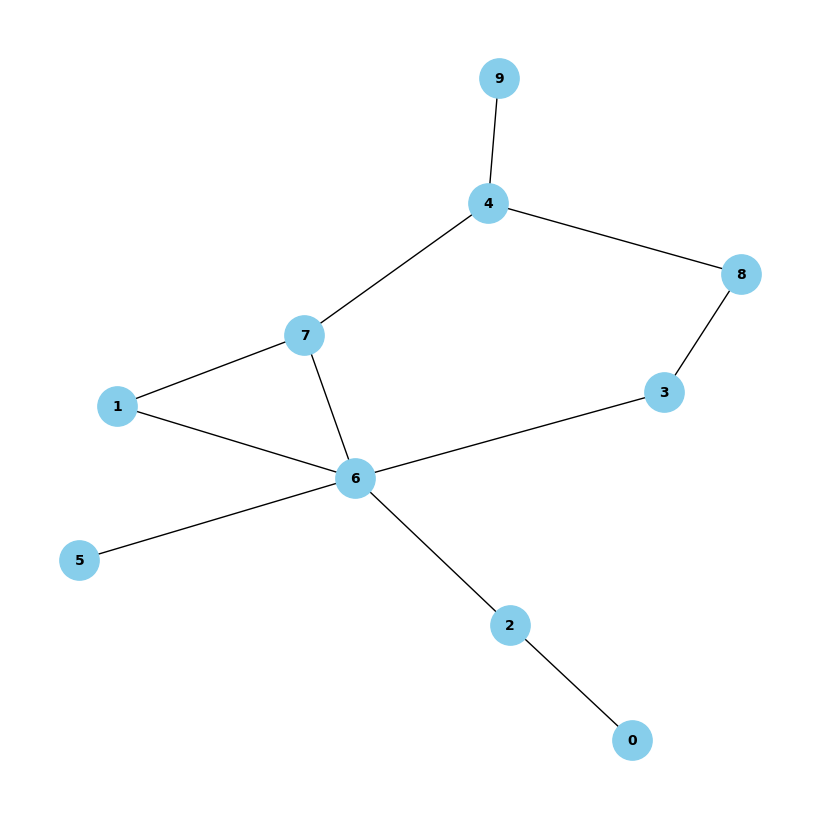

Premer grafa: 4
Iteracija: 8


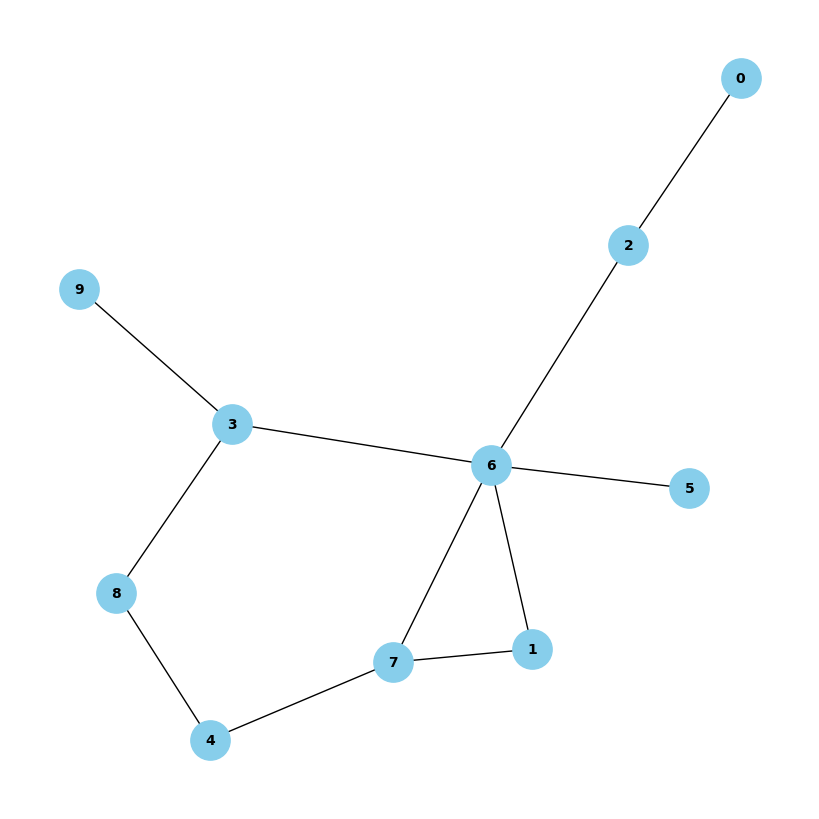

Premer grafa: 4
Iteracija: 9


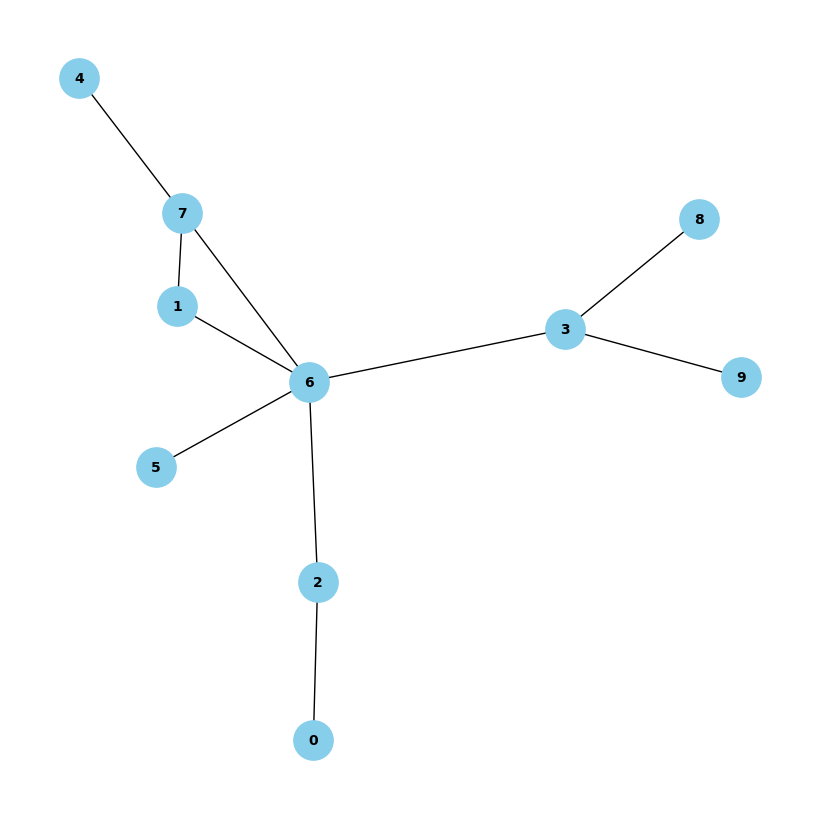

Premer zadnjega grafa: 4


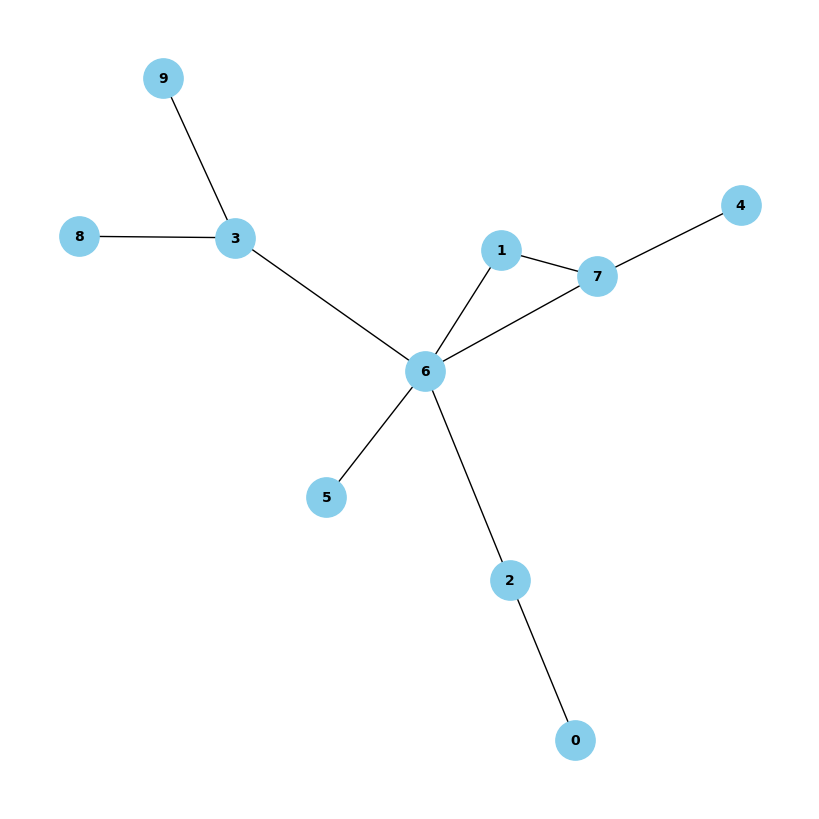

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G


def vsota_vseh_lokalnih_premerov(graf):
    vsota = 0
    for n in graf.nodes:
        vsota += nx.eccentricity(graf, n)
    return vsota


def iskanje_ravnotezja(n, e, max_iteracij):
    trenutna_resitev = nakljucni_zacetni_graf(n, e)
    for iteracija in range(max_iteracij):
        vozlisce1 = random.choice(list(trenutna_resitev.nodes))
        # Odstrani nakljucno povezavo prvega vozlisca
        povezave_vozlisca1 = list(trenutna_resitev.edges(vozlisce1))
        nakljucna_povezava = random.choice(povezave_vozlisca1)
        nova_resitev = trenutna_resitev.copy()
        nova_resitev.remove_edge(*nakljucna_povezava)
        if nx.is_connected(nova_resitev):
            if nx.eccentricity(trenutna_resitev, vozlisce1) >= nx.eccentricity(nova_resitev, vozlisce1):
                trenutna_resitev = nova_resitev.copy()
                print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                print(f"Iteracija: {iteracija}")
                plt.figure(figsize=(8, 8))
                nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                plt.show()
        else:
            # Izbere nakljucno drugo vozlisce in ga poveze z prvim
            vozlisce2 = random.choice(list(trenutna_resitev.nodes - set([vozlisce1])))
            nova_resitev.add_edge(vozlisce1, vozlisce2) 
            # Preveri ali je nova rešitev boljša za vozlišče 1, če je posodobi trenutno rešitev
            if nx.is_connected(nova_resitev):
                if nx.eccentricity(trenutna_resitev, vozlisce1) > nx.eccentricity(nova_resitev, vozlisce1):
                    trenutna_resitev = nova_resitev.copy()
                    print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                    print(f"Iteracija: {iteracija}")
                    plt.figure(figsize=(8, 8))
                    nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                    plt.show()
    return trenutna_resitev


st_vozlisc = 10
max_iteracij = 10
st_povezav = 15

zadnji_graf = iskanje_ravnotezja(st_vozlisc, st_povezav, max_iteracij)
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")


plt.figure(figsize=(8, 8))
nx.draw(zadnji_graf, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()

Premer grafa: 7
Iteracija: 1
Graf je drevo, ni pa v max ravnovesju


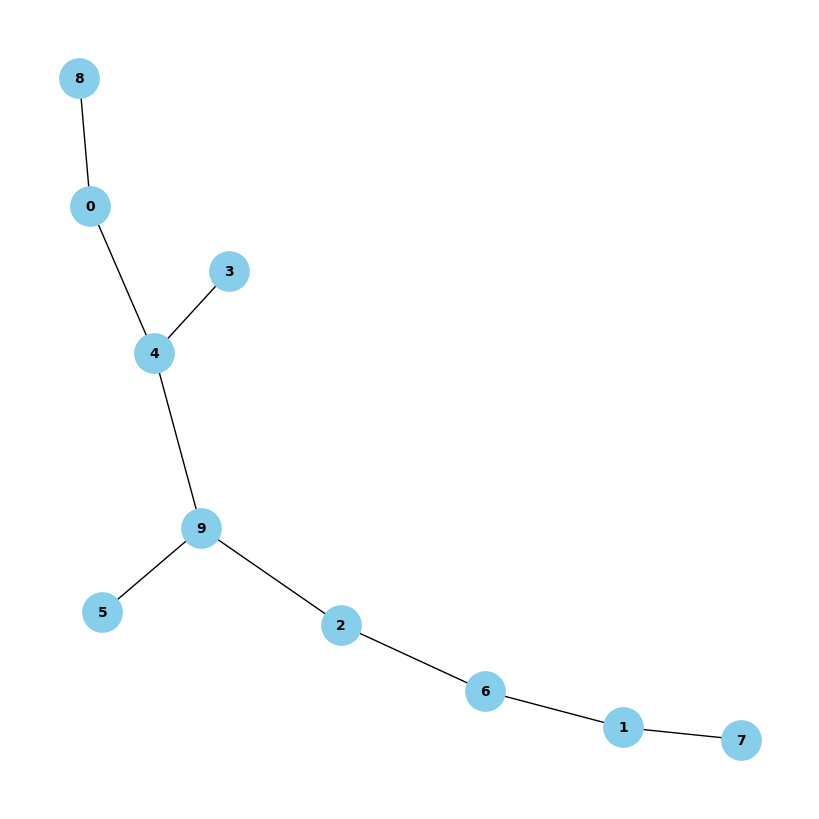

Premer grafa: 6
Iteracija: 2
Graf je drevo, ni pa v max ravnovesju


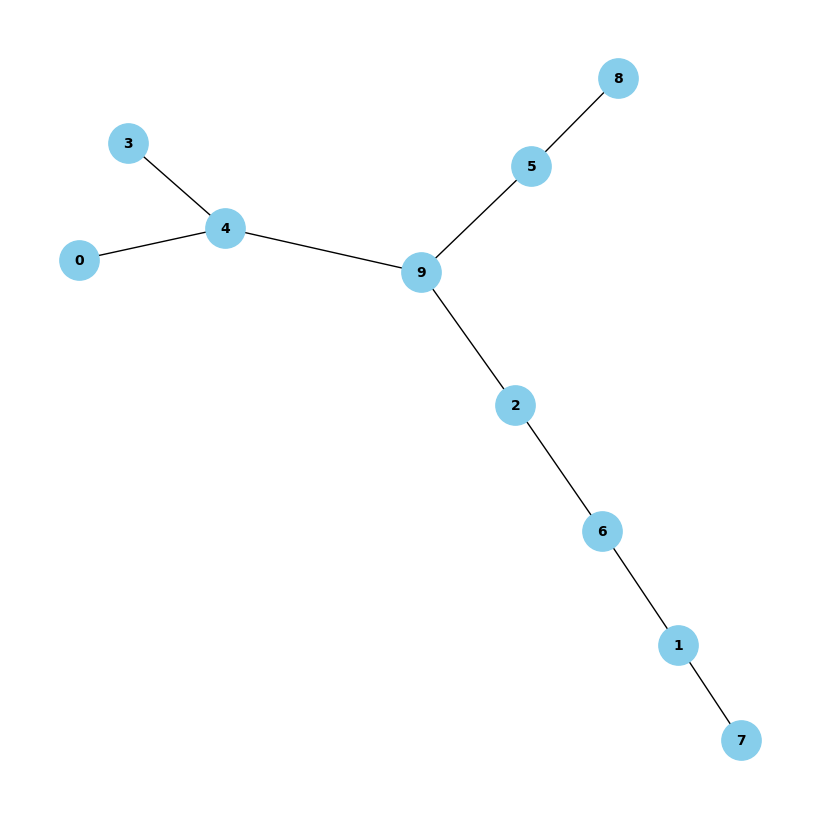

Premer grafa: 5
Iteracija: 3
Graf je drevo, ni pa v max ravnovesju


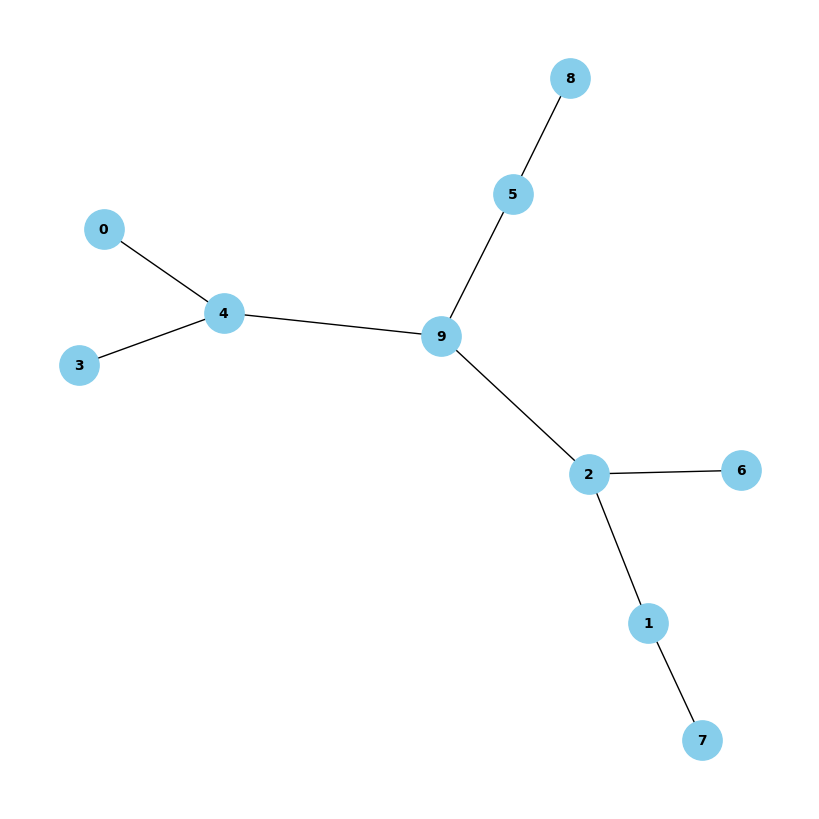

Premer grafa: 4
Iteracija: 19
Graf je drevo, ni pa v max ravnovesju


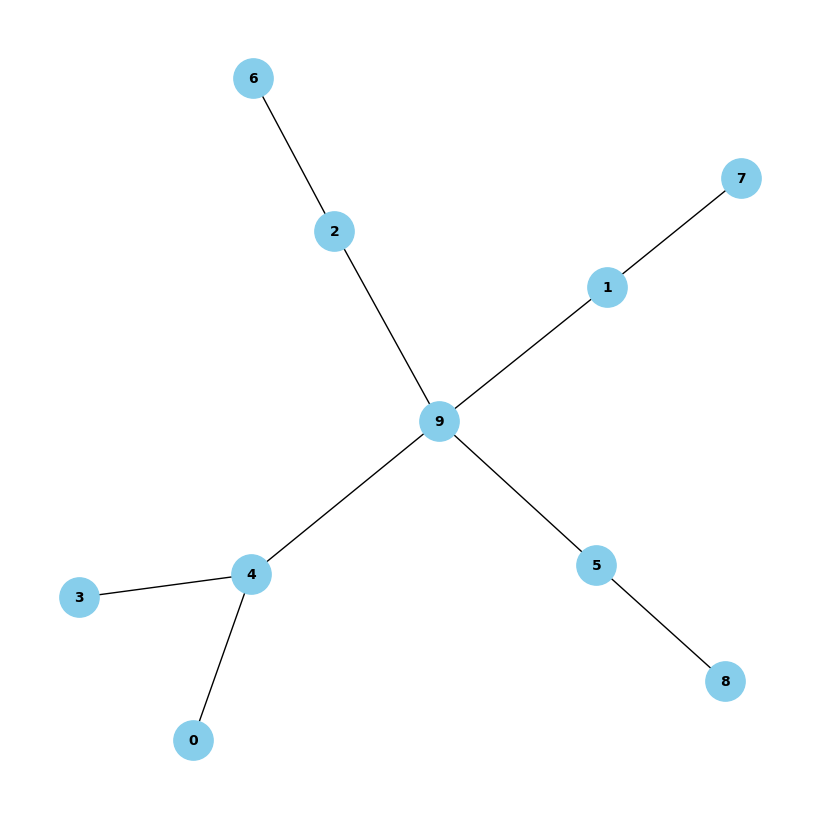

Premer grafa: 4
Iteracija: 28
Graf je drevo, ni pa v max ravnovesju


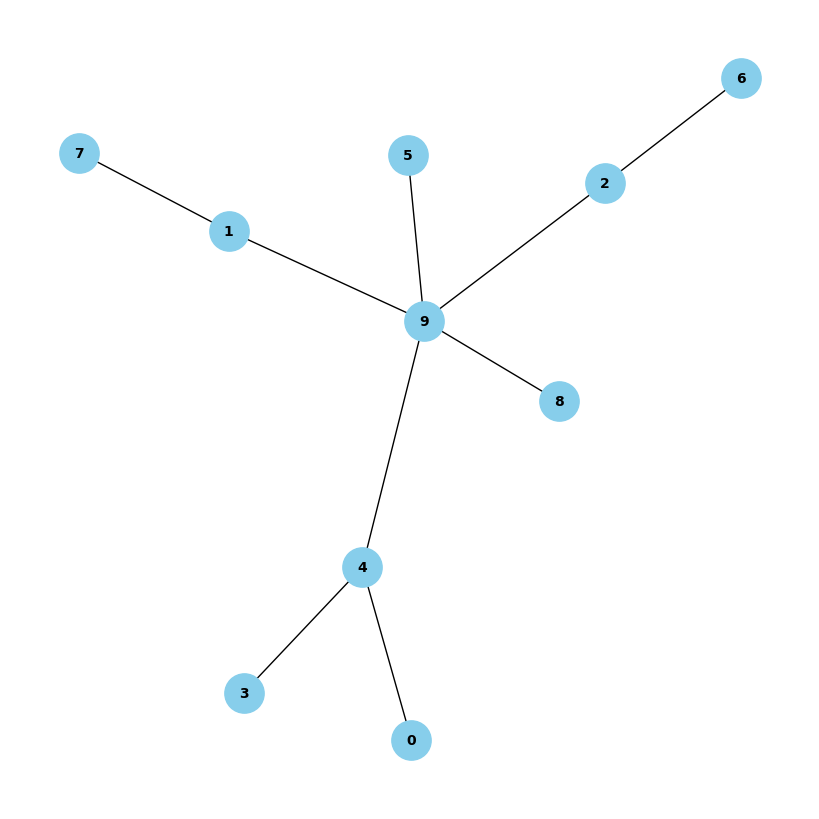

Premer grafa: 4
Iteracija: 34
Graf je drevo, ni pa v max ravnovesju


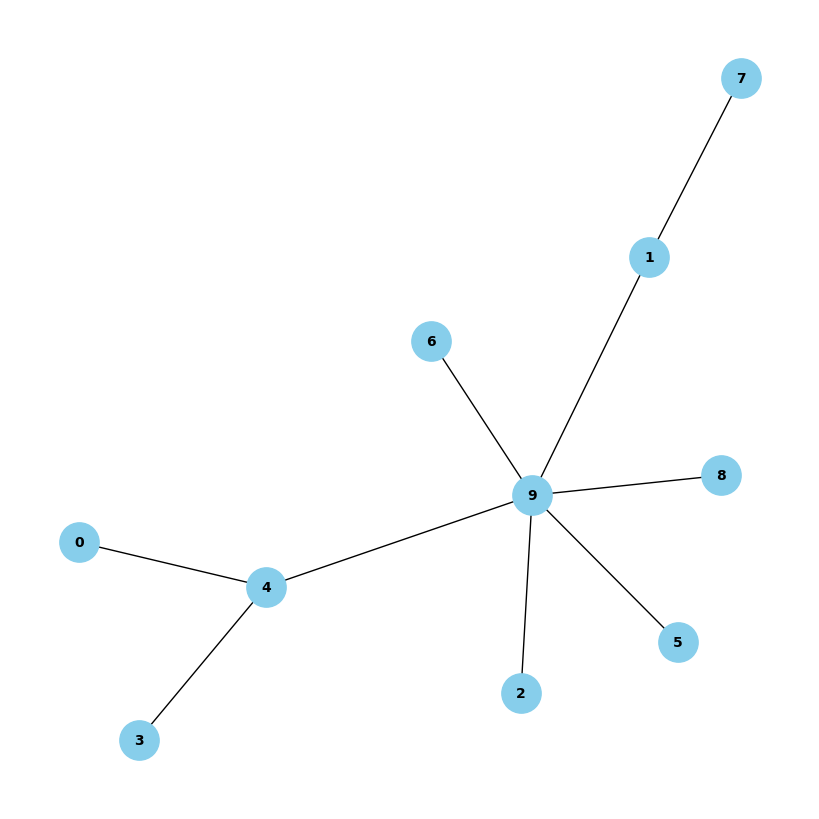

Premer grafa: 3
Iteracija: 41
Graf je drevo v max ravnovesju


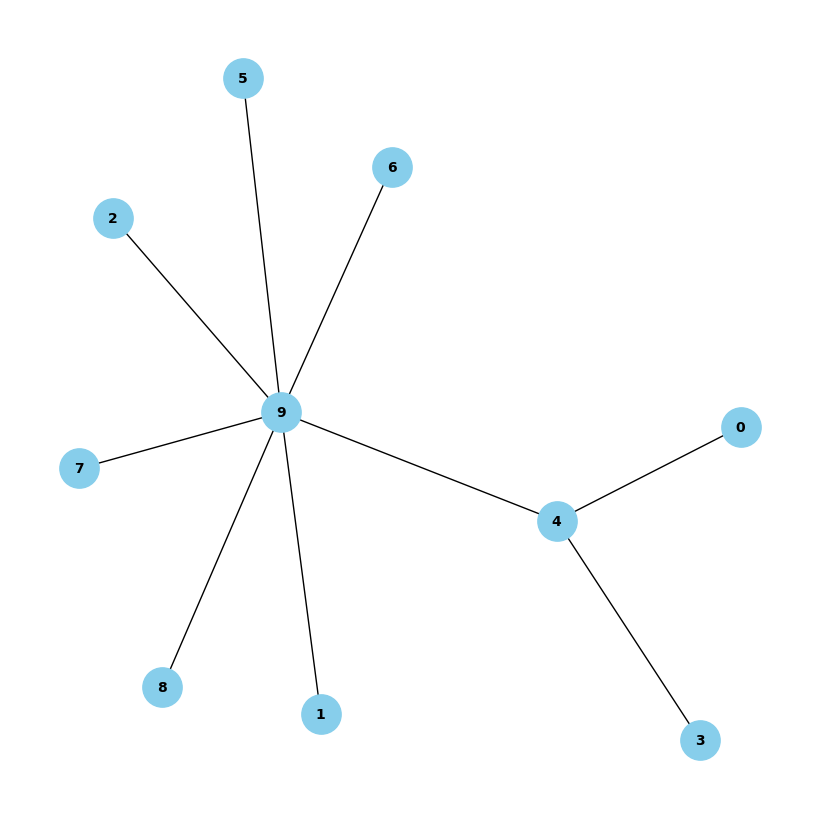

Premer zadnjega grafa: 3
Graf je drevo v max ravnovesju


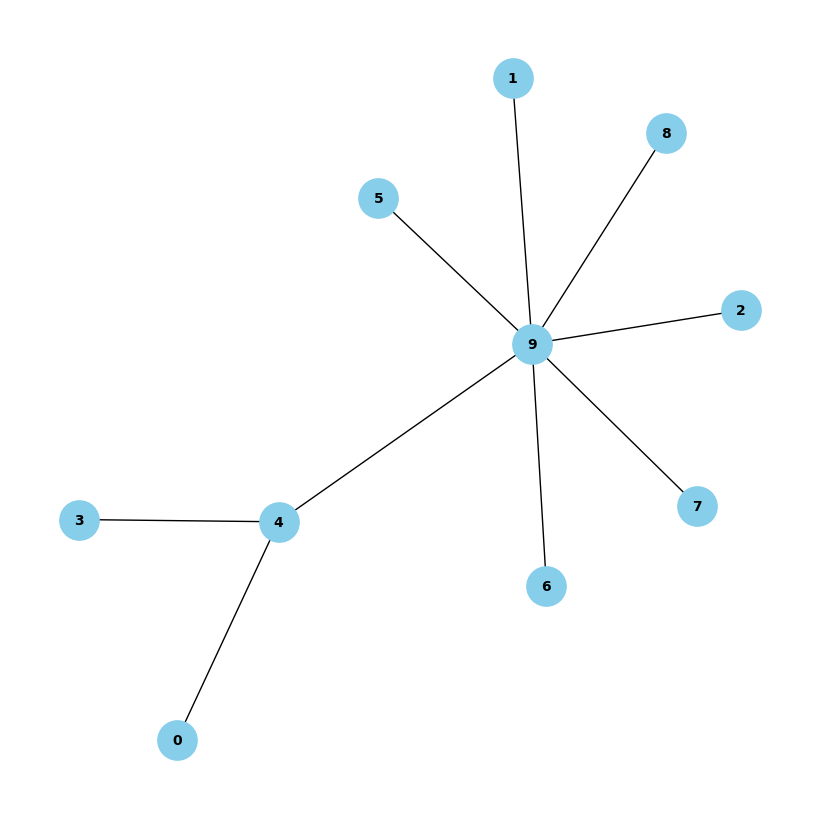

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def swap_equilibrium_max_drevo(graf):
    if not nx.is_connected(graf):
        return 'Graf ni povezan in torej ni drevo v max ravnovesju'
    elif len(graf.edges) == graf.number_of_nodes() - 1:
        if nx.diameter(graf) > 3:
            return 'Graf je drevo, ni pa v max ravnovesju'
        elif nx.diameter(graf) == 3:
            rez_vozlisca = list(nx.articulation_points(graf))
            for vozlisce in rez_vozlisca:
                if graf.degree(vozlisce) < 3:
                    return 'Graf je drevo, ni pa v max ravnovesju'
            return 'Graf je drevo v max ravnovesju'
        else:
            return 'Graf je drevo v max ravnovesju'


def iskanje_ravnotezja_drevo(n, max_iteracij):
    trenutna_resitev = nx.random_tree(n)
    for iteracija in range(max_iteracij):
        vozlisce1 = random.choice(list(trenutna_resitev.nodes))
        # Odstrani nakljucno povezavo prvega vozlisca
        povezave_vozlisca1 = list(trenutna_resitev.edges(vozlisce1))
        nakljucna_povezava = random.choice(povezave_vozlisca1)
        nova_resitev = trenutna_resitev.copy()
        nova_resitev.remove_edge(*nakljucna_povezava)
        if nx.is_connected(nova_resitev):
            if nx.eccentricity(trenutna_resitev, vozlisce1) >= nx.eccentricity(nova_resitev, vozlisce1):
                trenutna_resitev = nova_resitev.copy()
                print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                print(f"Iteracija: {iteracija}")
                print(f"{swap_equilibrium_max_drevo(trenutna_resitev)}")
                plt.figure(figsize=(8, 8))
                nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                plt.show()
        else:
            # Izbere nakljucno drugo vozlisce in ga poveze z prvim
            vozlisce2 = random.choice(list(trenutna_resitev.nodes - set([vozlisce1])))
            nova_resitev.add_edge(vozlisce1, vozlisce2) 
            # Preveri ali je nova rešitev boljša za vozlišče 1, če je posodobi trenutno rešitev
            if nx.is_connected(nova_resitev):
                if nx.eccentricity(trenutna_resitev, vozlisce1) > nx.eccentricity(nova_resitev, vozlisce1):
                    trenutna_resitev = nova_resitev.copy()
                    print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                    print(f"Iteracija: {iteracija}")
                    print(f"{swap_equilibrium_max_drevo(trenutna_resitev)}")
                    plt.figure(figsize=(8, 8))
                    nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                    plt.show()
    return trenutna_resitev


st_vozlisc = 10
max_iteracij = 100

zadnji_graf = iskanje_ravnotezja_drevo(st_vozlisc, max_iteracij)
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")
print(f"{swap_equilibrium_max_drevo(zadnji_graf)}")

plt.figure(figsize=(8, 8))
nx.draw(zadnji_graf, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()


Premer grafa: 8
Iteracija: 0
Graf je drevo, ni pa v max ravnovesju


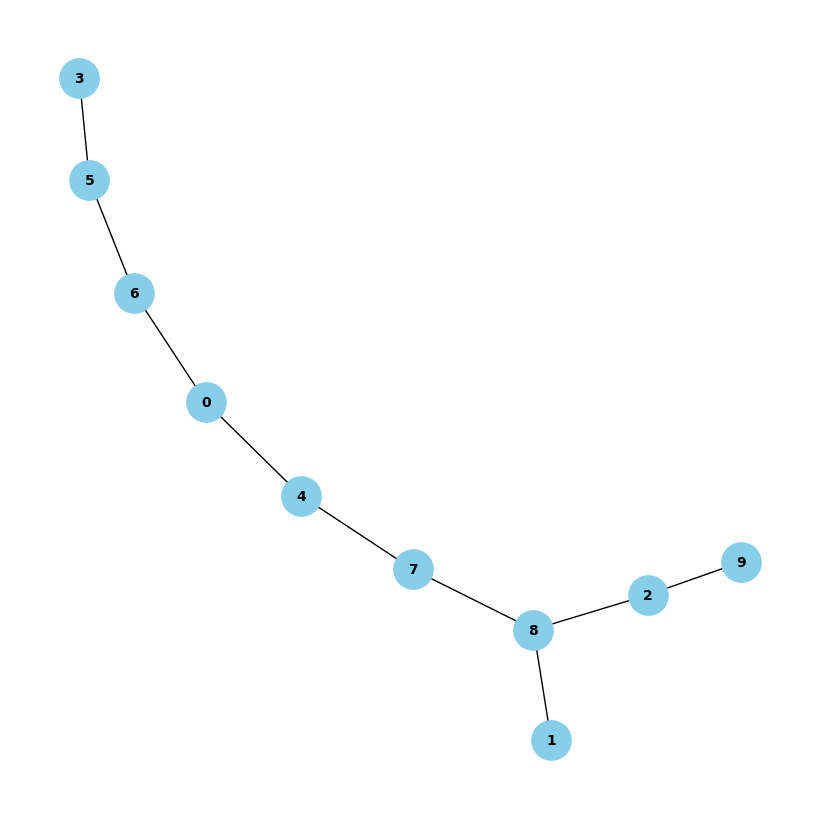

Premer grafa: 7
Iteracija: 1
Graf je drevo, ni pa v max ravnovesju


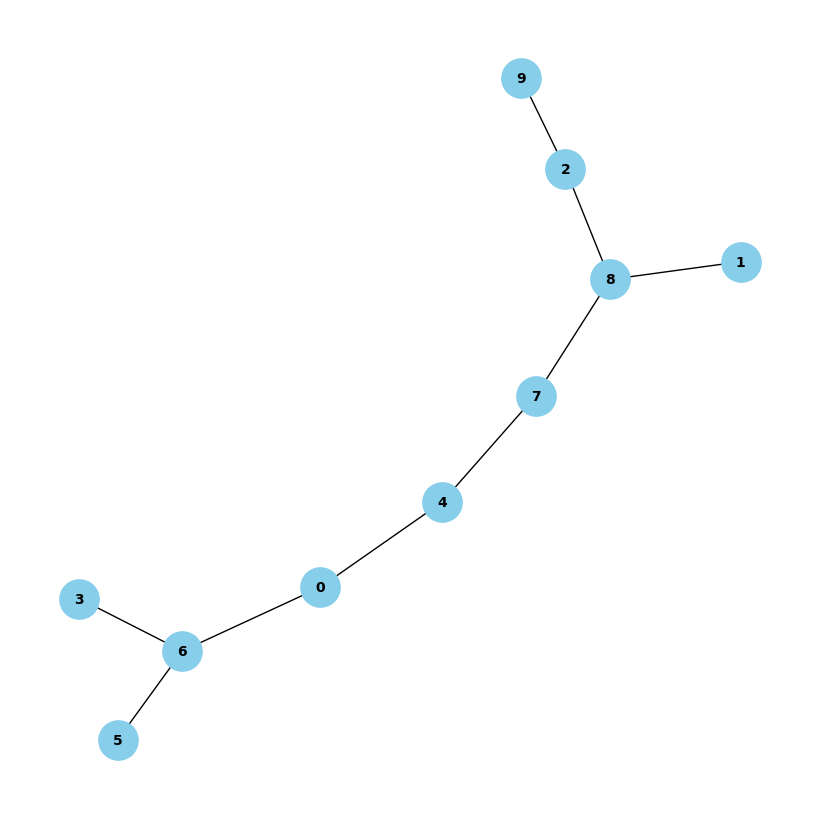

Premer grafa: 7
Iteracija: 2
Graf je drevo, ni pa v max ravnovesju


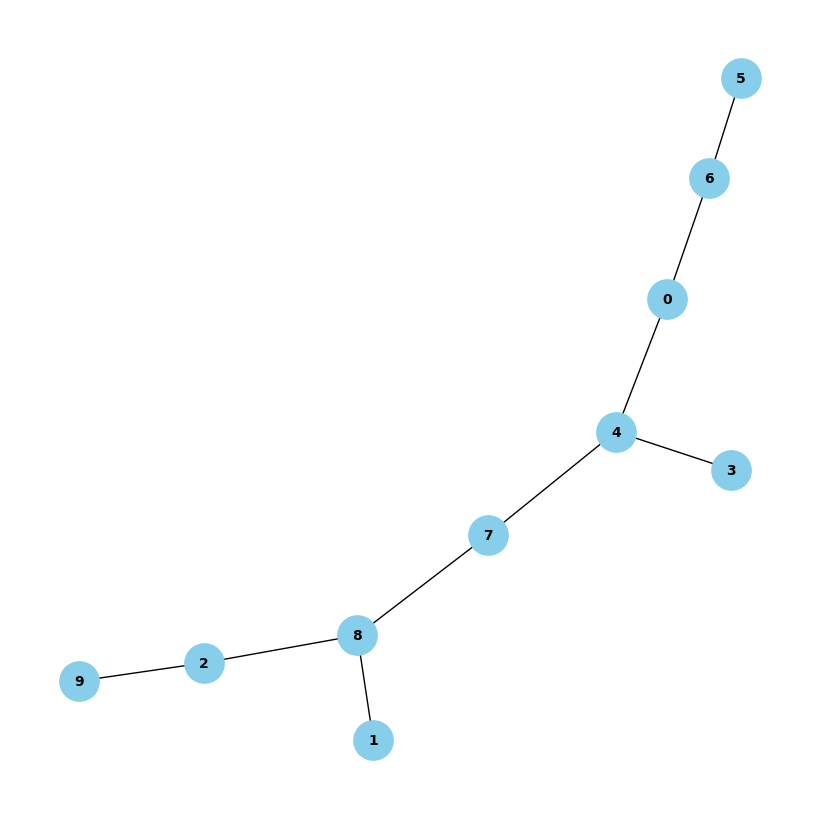

Premer grafa: 6
Iteracija: 3
Graf je drevo, ni pa v max ravnovesju


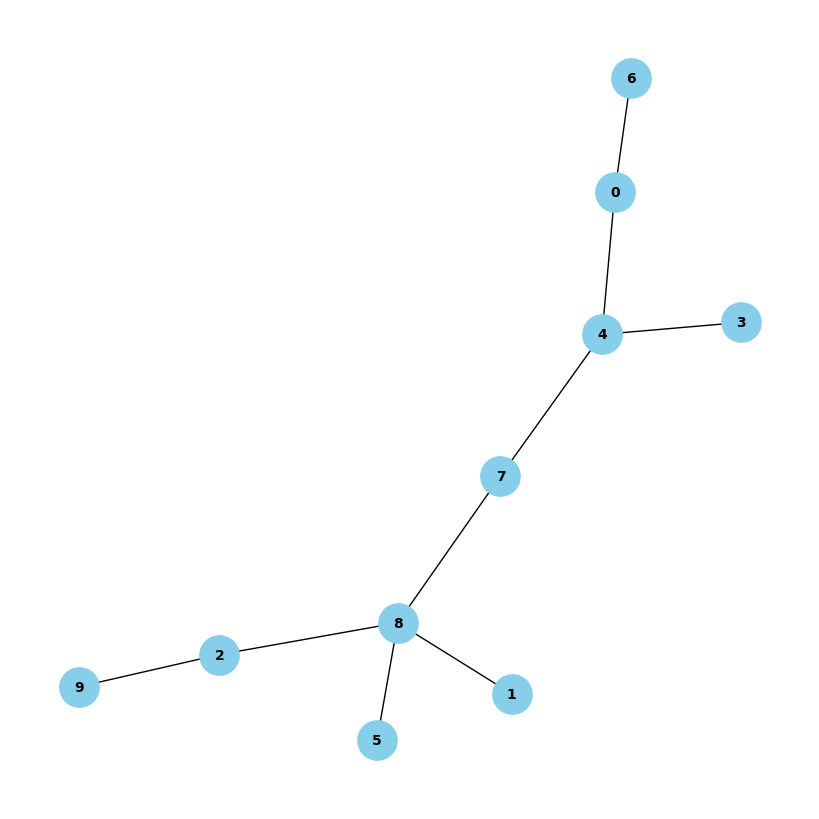

Premer grafa: 5
Iteracija: 4
Graf je drevo, ni pa v max ravnovesju


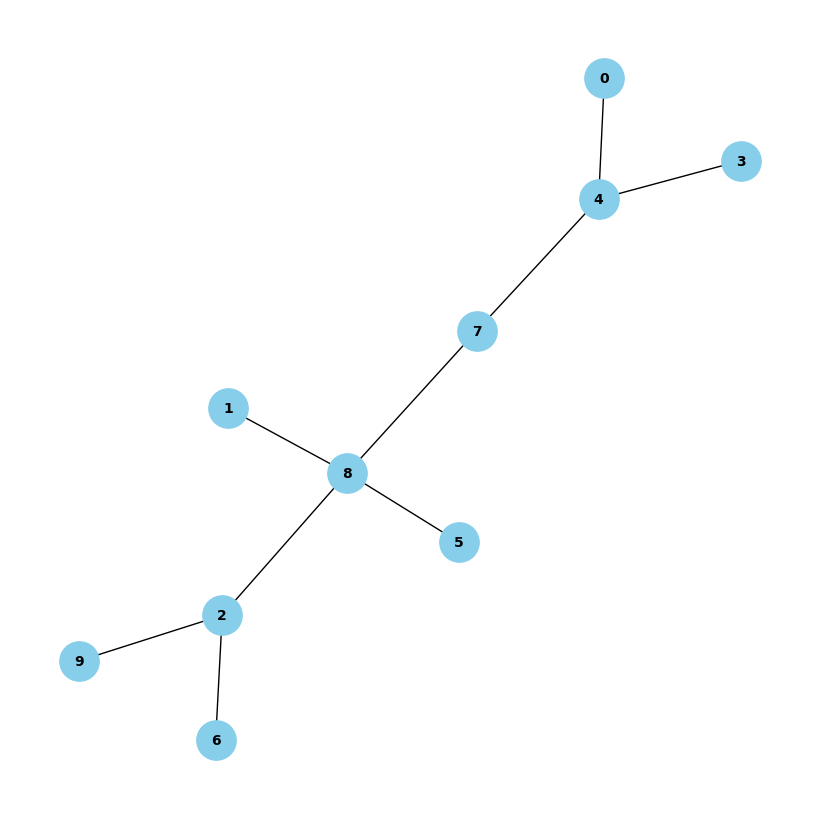

Premer grafa: 5
Iteracija: 11
Graf je drevo, ni pa v max ravnovesju


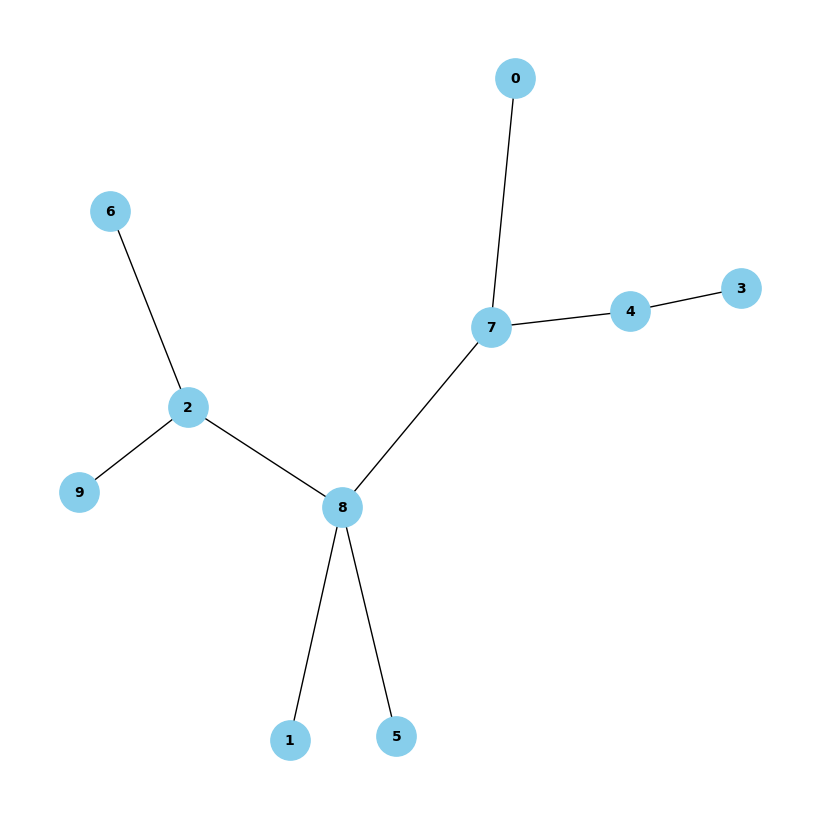

Premer grafa: 4
Iteracija: 12
Graf je drevo, ni pa v max ravnovesju


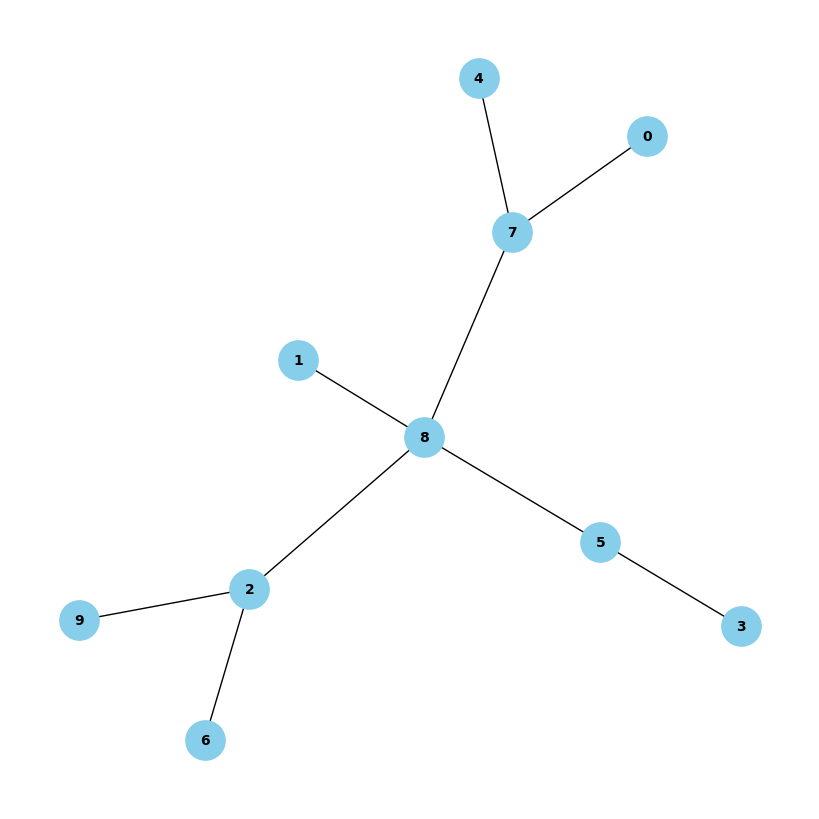

Premer grafa: 4
Iteracija: 23
Graf je drevo, ni pa v max ravnovesju


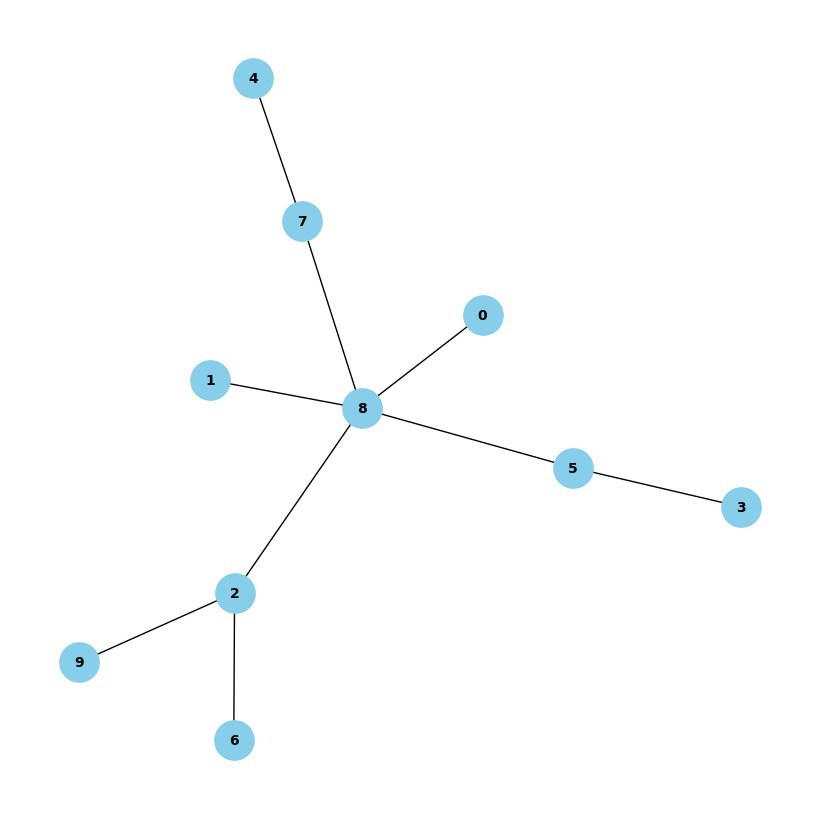

Premer grafa: 4
Iteracija: 29
Graf je drevo, ni pa v max ravnovesju


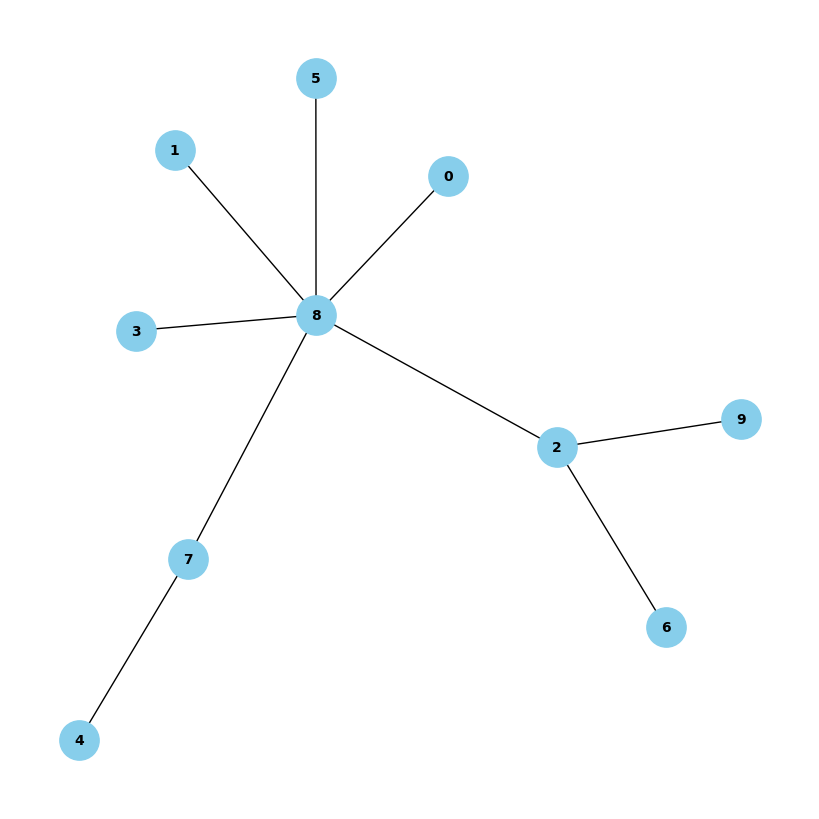

Premer grafa: 3
Iteracija: 33
Graf je drevo v max ravnovesju


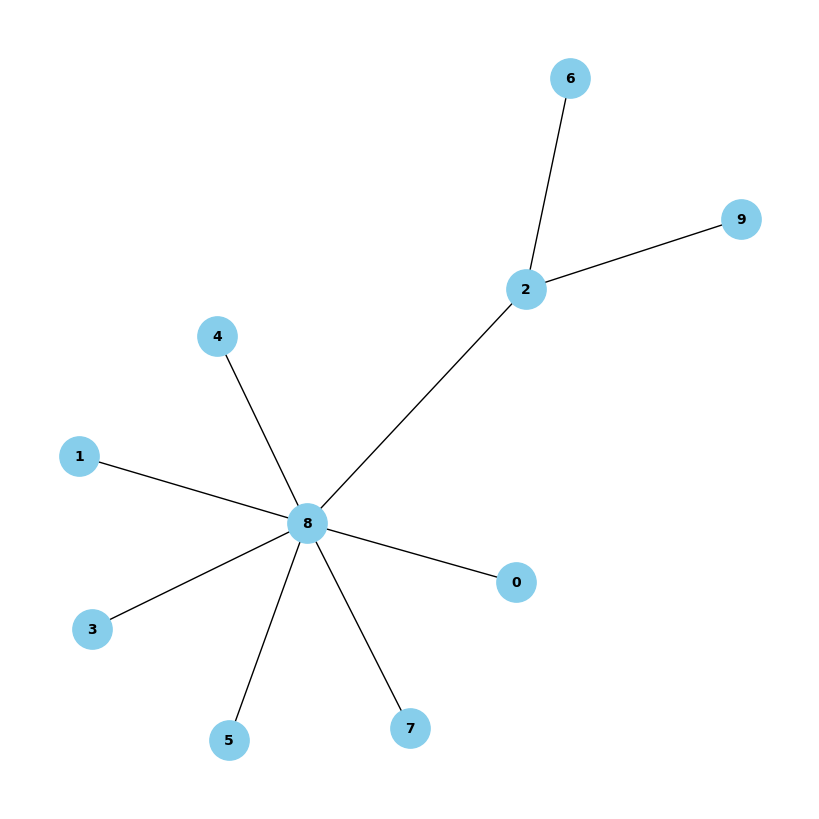

Premer zadnjega grafa: 3
Graf je drevo v max ravnovesju


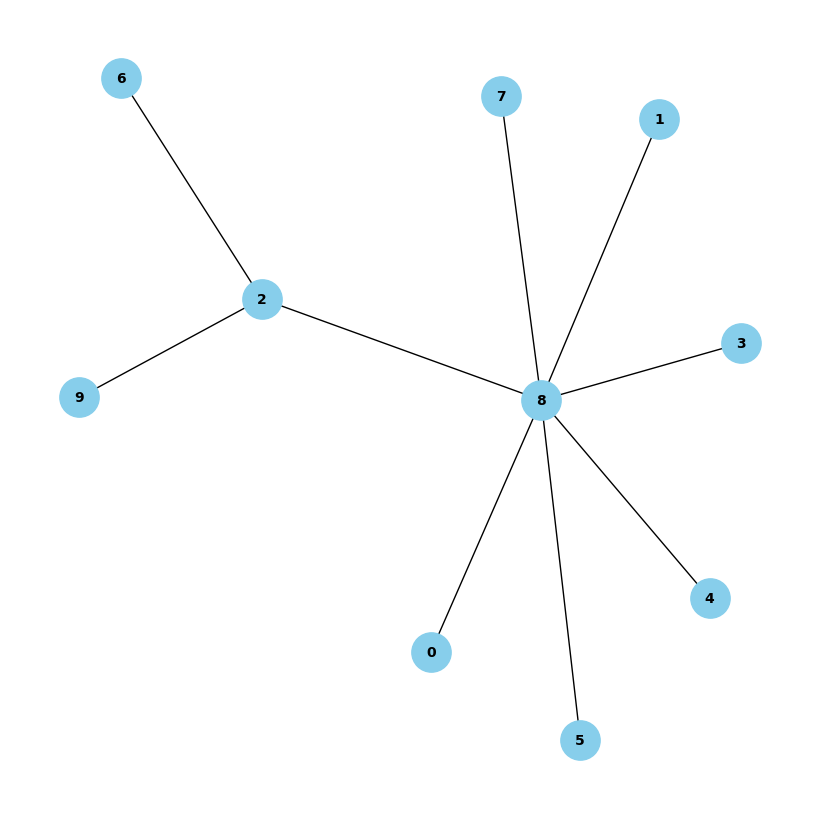

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def swap_equilibrium_max_drevo(graf):
    if not nx.is_connected(graf):
        return 'Graf ni povezan in torej ni drevo v max ravnovesju'
    elif len(graf.edges) == graf.number_of_nodes() - 1:
        if nx.diameter(graf) > 3:
            return 'Graf je drevo, ni pa v max ravnovesju'
        elif nx.diameter(graf) == 3:
            rez_vozlisca = list(nx.articulation_points(graf))
            for vozlisce in rez_vozlisca:
                if graf.degree(vozlisce) < 3:
                    return 'Graf je drevo, ni pa v max ravnovesju'
            return 'Graf je drevo v max ravnovesju'
        else:
            return 'Graf je drevo v max ravnovesju'


def iskanje_ravnotezja_drevo(n, max_iteracij):
    trenutna_resitev = nx.random_tree(n)
    for iteracija in range(max_iteracij):
        eccentricities = nx.eccentricity(trenutna_resitev)
        vozlisce1 = max(eccentricities, key=eccentricities.get)
        # Odstrani nakljucno povezavo prvega vozlisca
        povezave_vozlisca1 = list(trenutna_resitev.edges(vozlisce1))
        nakljucna_povezava = random.choice(povezave_vozlisca1)
        nova_resitev = trenutna_resitev.copy()
        nova_resitev.remove_edge(*nakljucna_povezava)
        if nx.is_connected(nova_resitev):
            if nx.eccentricity(trenutna_resitev, vozlisce1) >= nx.eccentricity(nova_resitev, vozlisce1):
                trenutna_resitev = nova_resitev.copy()
                print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                print(f"Iteracija: {iteracija}")
                print(f"{swap_equilibrium_max_drevo(trenutna_resitev)}")
                plt.figure(figsize=(8, 8))
                nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                plt.show()
        else:
            # Izbere nakljucno drugo vozlisce in ga poveze z prvim
            vozlisce2 = random.choice(list(trenutna_resitev.nodes - set([vozlisce1])))
            nova_resitev.add_edge(vozlisce1, vozlisce2) 
            # Preveri ali je nova rešitev boljša za vozlišče 1, če je posodobi trenutno rešitev
            if nx.is_connected(nova_resitev):
                if nx.eccentricity(trenutna_resitev, vozlisce1) > nx.eccentricity(nova_resitev, vozlisce1):
                    trenutna_resitev = nova_resitev.copy()
                    print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                    print(f"Iteracija: {iteracija}")
                    print(f"{swap_equilibrium_max_drevo(trenutna_resitev)}")
                    plt.figure(figsize=(8, 8))
                    nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                    plt.show()
    return trenutna_resitev


st_vozlisc = 10
max_iteracij = 100

zadnji_graf = iskanje_ravnotezja_drevo(st_vozlisc, max_iteracij)
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")
print(f"{swap_equilibrium_max_drevo(zadnji_graf)}")

plt.figure(figsize=(8, 8))
nx.draw(zadnji_graf, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()


In [5]:
def potratno_ravnovesje_max(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) >= nx.eccentricity(testni_graf, v1):
                        return f"Ni max ravnovesje, vozlišču {v1} se splača izbrisati povezavo {p}"
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) > nx.eccentricity(testni_graf, v1):
                        return f"Ni max ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'

potratno_ravnovesje_max(zadnji_graf)

'Je ravnovesje'

4
4
4
4
4
4
4
1
4
1
6
Je ravnovesje
Premer zadnjega grafa: 3


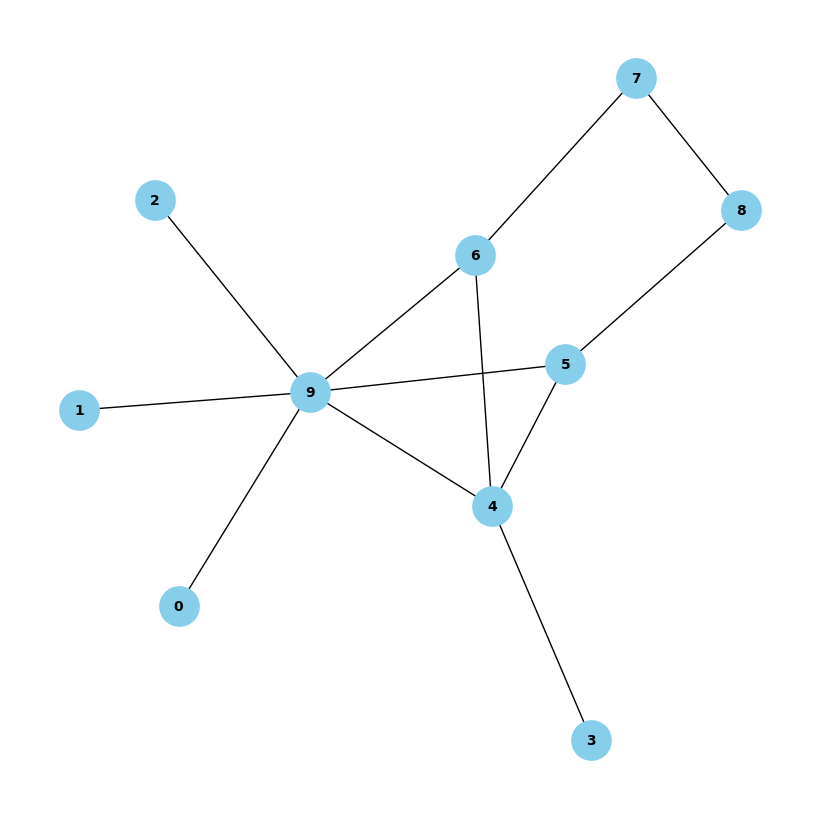

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def potratno_ravnovesje_max(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) >= nx.eccentricity(testni_graf, v1):
                        return f"Ni max ravnovesje, vozlišču {v1} se splača izbrisati povezavo {p}"
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) > nx.eccentricity(testni_graf, v1):
                        return f"Ni max ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'

def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G

# !!
def ekzaktno_max(n, e):
    graf = nakljucni_zacetni_graf(n, e)
    
    def loop_max(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and nx.eccentricity(graf, v1) >= nx.eccentricity(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            print('5')
                            return loop_max(ravnovesni_graf)
                        else:  #!!!!!
                            print('6')
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if nx.eccentricity(graf, v1) >= nx.eccentricity(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                print('4')
                                return loop_max(ravnovesni_graf)
                    testni_graf.add_edge(v1, v2)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and nx.eccentricity(graf, v1) > nx.eccentricity(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            print('2')
                            return loop_max(ravnovesni_graf)
                        else:
                            print('3')
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if nx.eccentricity(graf, v1) > nx.eccentricity(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                print('1')
                                return loop_max(ravnovesni_graf)
        
    
    return loop_max(graf)

opti = ekzaktno_max(10, 20)
print(potratno_ravnovesje_max(opti))
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")
plt.figure(figsize=(8, 8))
nx.draw(opti, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
opti.nodes()

4
4
4
4
4
4
4
4
4
4
3
Je ravnovesje
Premer zadnjega grafa: 3


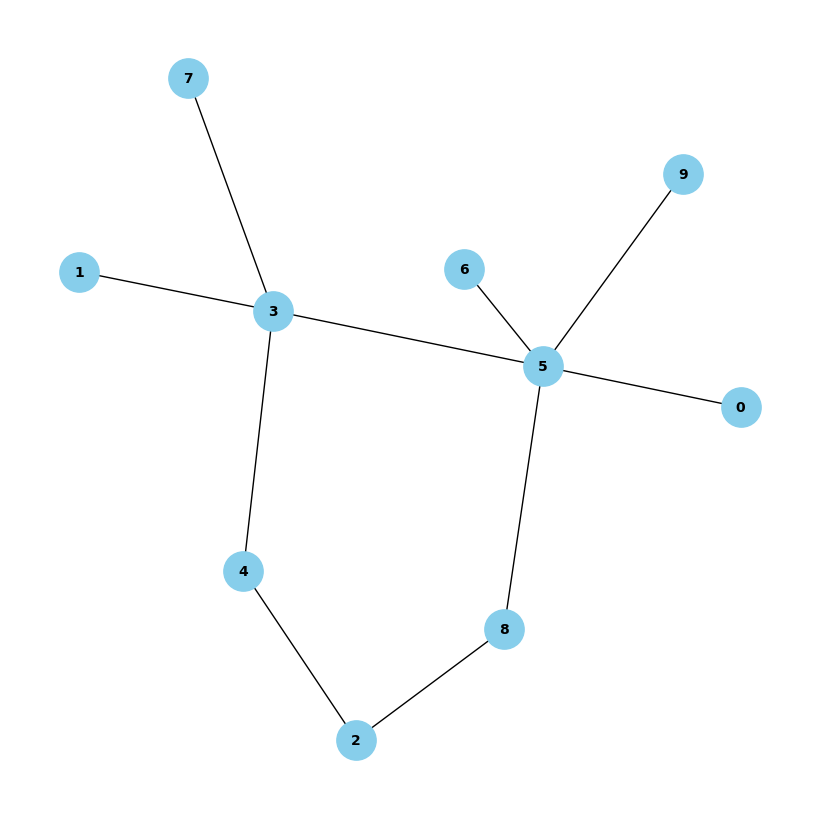

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def potratno_ravnovesje_max(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) >= nx.eccentricity(testni_graf, v1):
                        return f"Ni max ravnovesje, vozlišču {v1} se splača izbrisati povezavo {p}"
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) > nx.eccentricity(testni_graf, v1):
                        return f"Ni max ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'

def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G

# !!
def ekzaktno_max(n, e):
    graf = nakljucni_zacetni_graf(n, e)
    
    def loop_max(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and nx.eccentricity(graf, v1) > nx.eccentricity(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            print('2')
                            return loop_max(ravnovesni_graf)
                        else:
                            print('3')
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if nx.eccentricity(graf, v1) > nx.eccentricity(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                print('1')
                                return loop_max(ravnovesni_graf)
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and nx.eccentricity(graf, v1) >= nx.eccentricity(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            print('5')
                            return loop_max(ravnovesni_graf)
                        else:
                            print('6')
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if nx.eccentricity(graf, v1) >= nx.eccentricity(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                print('4')
                                return loop_max(ravnovesni_graf)
        
    
    return loop_max(graf)

opti = ekzaktno_max(10, 20)
print(potratno_ravnovesje_max(opti))
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")
plt.figure(figsize=(8, 8))
nx.draw(opti, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
opti.nodes()